In [1]:
# C:\Mark\uni\Uni Work\5th Year\Diss\ROC Surfaces\adni_noNA.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [2]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158


In [3]:
d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

<IPython.core.display.Javascript object>


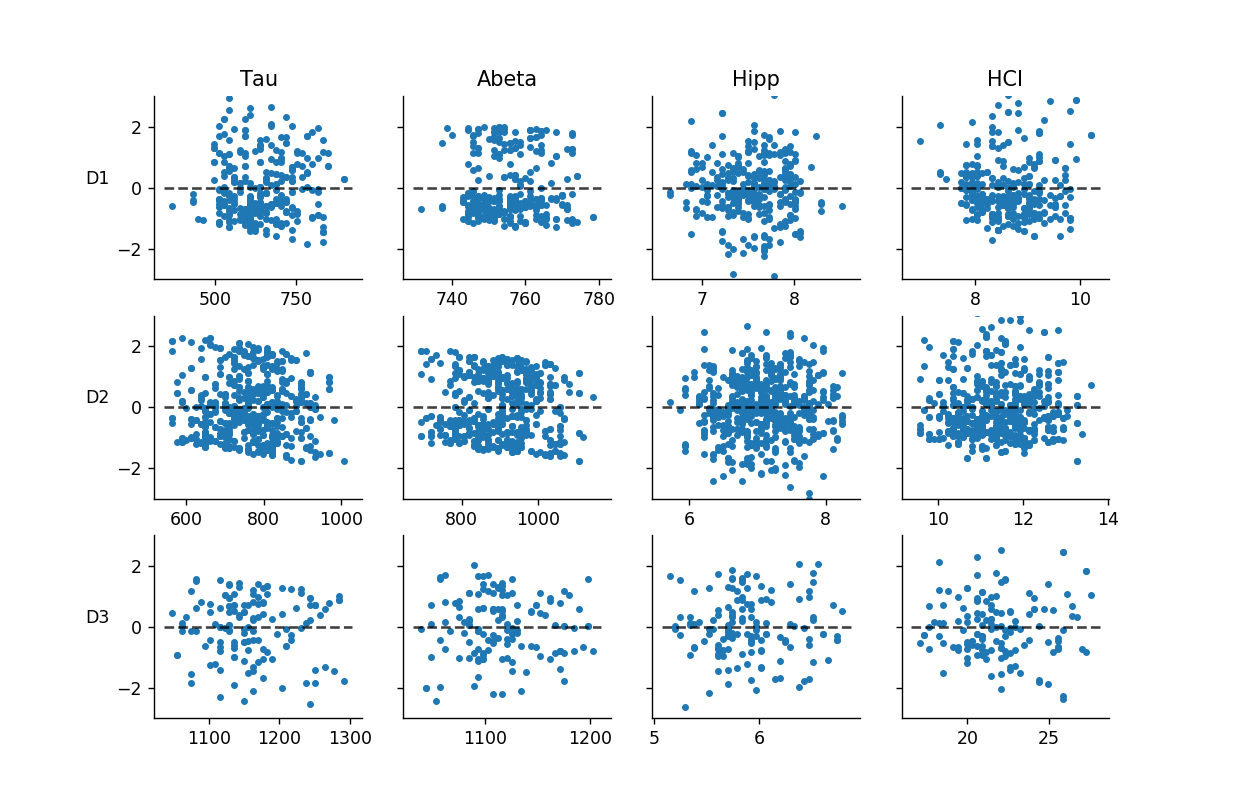

In [12]:
fig, ax = plt.subplots(3,4)
#mpl.rcParams['text.usetex'] = True

#lafont = {'fontstyle':'Computer Modern'}

counti = 0
countj = 0

rmveaxis = True

for i in [d1, d2, d3]:
    for j in ['tau', 'abeta', 'Hipp', 'HCI']:
               
        # Pick out only the marker values
        d_marker = np.array(i[j])

        # Pick out only the ages
        d_age= np.array(i['age'])

        # Reshape the data to work with sklearn
        d_age = d_age.reshape(-1, 1)
        d_marker = d_marker.reshape(-1, 1)

        # Fit the linear model and find the parameters and the standard residual error for healthy
        regd = LinearRegression().fit(d_age, d_marker)
        beta = [regd.intercept_[0], regd.coef_[0][0]]
        # Calculate sigma hat
        y_hat = regd.predict(d_age)
        residuals = d_marker - y_hat
        #residual_sum_of_squaresd1 = residualsd1.T @ residualsd1
        #sigmad1 = np.sqrt(residual_sum_of_squaresd1/(len(d1_marker)-2))
        
        ax[counti, countj].plot(y_hat, residuals/np.std(residuals), '.')
        #ax[counti, countj].tick_params(left = False, right = False , labelleft = True, labelbottom=True)
        
        minx, maxx = ax[counti, countj].get_xlim()
        ax[counti, countj].plot([minx,maxx],np.zeros(2), 'k--', alpha=0.75)
        
        if rmveaxis:
            if countj != 0:
               ax[counti, countj].tick_params(left = True, right = False , labelleft = False, labelbottom=True)     
            
        ax[counti, countj].spines['right'].set_visible(False)
        ax[counti, countj].spines['top'].set_visible(False)
        
        #ax[counti, countj].set_xlim(55,90)
        #ax[counti, countj].set_xticks([55,65,75,85,90])
        
        if countj == 0 and counti == 0:
            ax[counti, countj].set_title('$\mathrm{Tau}$')
        elif countj == 1 and counti == 0:
            ax[counti, countj].set_title('Abeta')
        elif countj == 2 and counti == 0:
            ax[counti, countj].set_title(j)
        elif countj == 3 and counti == 0:
            ax[counti, countj].set_title(j)
            
        if countj == 0 and counti == 0:
            ax[counti, countj].set_ylabel('D1', rotation=0, ha='right')
        elif countj == 0 and counti == 1:
            ax[counti, countj].set_ylabel('D2', rotation=0, ha='right')
        elif countj == 0 and counti == 2:
            ax[counti, countj].set_ylabel('D3', rotation=0, ha='right')
        
        ax[counti, countj].set_ylim(-3,3)
        
        countj+=1
        
    countj=0
    counti+=1
